In [ ]:
! pip install -q tensorflow-model-optimization

In [ ]:
import keras

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt
import random




import random
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,BatchNormalization
from keras.layers import MaxPool2D,Dropout
from keras.layers import Flatten
from keras.layers import Dense
import cv2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

# define input data to CNN（28×28×1）
input_shape = (28, 28, 1)

# transform for Deep Learning
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
num_classes = 10
y_train_dl = keras.utils.to_categorical(y_train, num_classes)
y_test_dl = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
model = Sequential()

model.add(Conv2D(input_shape=input_shape, filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
# model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=num_classes, activation="softmax"))
model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 128)       147584    
                                                      

In [ ]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
epochs = 10
history = model.fit(x_train, y_train_dl,
                    batch_size=64, #Number of simultaneous learning
                    epochs=epochs, #Number of train
                    verbose=1, # halfway output
                    validation_data=(x_test, y_test_dl)) # data for validation

Epoch 1/10
938/938 [==============================] - 29s 28ms/step - loss: 0.4903 - accuracy: 0.8179 - val_loss: 0.3368 - val_accuracy: 0.8734
Epoch 2/10
938/938 [==============================] - 20s 21ms/step - loss: 0.2985 - accuracy: 0.8890 - val_loss: 0.2618 - val_accuracy: 0.9031
Epoch 3/10
938/938 [==============================] - 20s 21ms/step - loss: 0.2512 - accuracy: 0.9061 - val_loss: 0.2438 - val_accuracy: 0.9106
Epoch 4/10
938/938 [==============================] - 20s 21ms/step - loss: 0.2266 - accuracy: 0.9164 - val_loss: 0.2489 - val_accuracy: 0.9113
Epoch 5/10
938/938 [==============================] - 21s 22ms/step - loss: 0.2055 - accuracy: 0.9238 - val_loss: 0.2299 - val_accuracy: 0.9166
Epoch 6/10
938/938 [==============================] - 20s 21ms/step - loss: 0.1862 - accuracy: 0.9308 - val_loss: 0.2194 - val_accuracy: 0.9216
Epoch 7/10
938/938 [==============================] - 20s 21ms/step - loss: 0.1761 - accuracy: 0.9340 - val_loss: 0.2488 - val_accuracy:

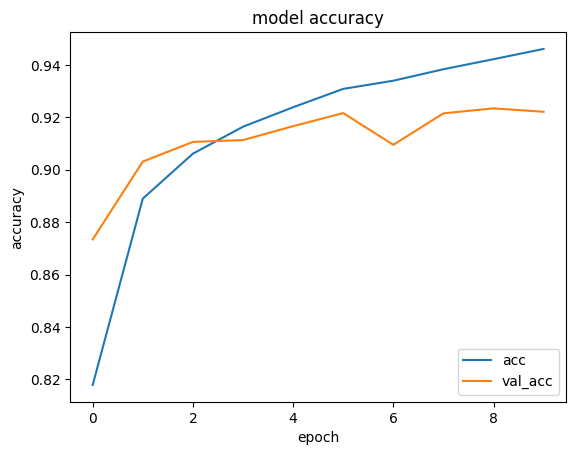

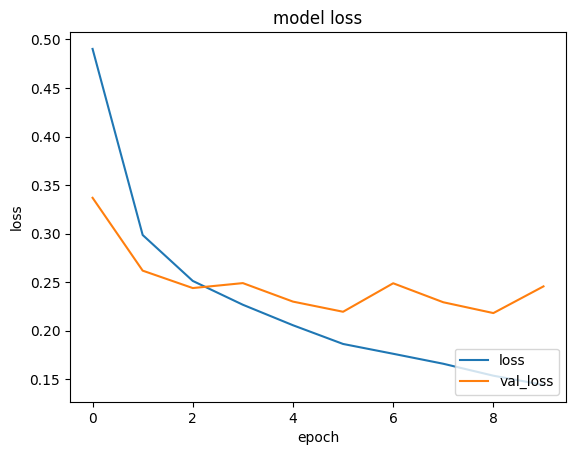

history.png  sample_data


<Figure size 640x480 with 0 Axes>

In [ ]:
## Visuarize train history

def plot_history(history):
    # print(history.history.keys())
    from matplotlib import pyplot as plt

    # accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

    ## saveimage
    plt.savefig("history.png")

# plot
plot_history(history)
!ls
#download
#from google.colab import files
#files.download("history.png")

In [ ]:
import tempfile
import tensorflow as tf
_, keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model, keras_file, include_optimizer=False)
print('Saved baseline model to:', keras_file)

Saved baseline model to: /tmp/tmpukqlog7n.h5


<ipython-input-40-b16d24075d5a>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model, keras_file, include_optimizer=False)


In [ ]:
import tensorflow_model_optimization as tfmot

prune_low_magnitude = tfmot.sparsity.keras.prune_low_magnitude

# Compute end step to finish pruning after 2 epochs.
batch_size = 128
epochs = 2
validation_split = 0.1 # 10% of training set will be used for validation set.

num_images = x_train.shape[0] * (1 - validation_split)
end_step = np.ceil(num_images / batch_size).astype(np.int32) * epochs

# Define model for pruning.
pruning_params = {
      'pruning_schedule': tfmot.sparsity.keras.PolynomialDecay(initial_sparsity=0.50,
                                                               final_sparsity=0.80,
                                                               begin_step=0,
                                                               end_step=end_step)
}

model_for_pruning = prune_low_magnitude(model, **pruning_params)

# `prune_low_magnitude` requires a recompile.

model_for_pruning.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(),
              metrics=["accuracy"])

model_for_pruning.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 prune_low_magnitude_conv2d  (None, 28, 28, 64)        1218      
 _8 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_conv2d  (None, 28, 28, 64)        73794     
 _9 (PruneLowMagnitude)                                          
                                                                 
 prune_low_magnitude_max_po  (None, 14, 14, 64)        1         
 oling2d_3 (PruneLowMagnitu                                      
 de)                                                             
                                                                 
 prune_low_magnitude_dropou  (None, 14, 14, 64)        1         
 t_2 (PruneLowMagnitude)                                         
                                                      

In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file)

<ipython-input-16-11ad47b980ba>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_for_export, pruned_keras_file, include_optimizer=False)


Saved pruned Keras model to: /tmp/tmp24p_03qq.h5


In [ ]:
logdir = tempfile.mkdtemp()

callbacks = [
  tfmot.sparsity.keras.UpdatePruningStep(),
  tfmot.sparsity.keras.PruningSummaries(log_dir=logdir),
]

model_for_pruning.fit(x_train, y_train_dl,
                  batch_size=batch_size, epochs=epochs, validation_split=validation_split,
                  callbacks=callbacks)



Epoch 1/2
  5/422 [..............................] - ETA: 21s - loss: 0.1317 - accuracy: 0.9438

422/422 [==============================] - 33s 54ms/step - loss: 0.1119 - accuracy: 0.9572 - val_loss: 0.1048 - val_accuracy: 0.9603
Epoch 2/2
422/422 [==============================] - 18s 42ms/step - loss: 0.0871 - accuracy: 0.9677 - val_loss: 0.1042 - val_accuracy: 0.9598


In [ ]:
_, model_for_pruning_accuracy = model_for_pruning.evaluate(
   x_test, y_test_dl, verbose=0)


print('Pruned test accuracy:', model_for_pruning_accuracy)


Pruned test accuracy: 0.9305999875068665


In [ ]:
model_for_export = tfmot.sparsity.keras.strip_pruning(model_for_pruning)

_, pruned_keras_file1 = tempfile.mkstemp('.h5')
tf.keras.models.save_model(model_for_export, pruned_keras_file1, include_optimizer=False)
print('Saved pruned Keras model to:', pruned_keras_file1)

<ipython-input-20-33dd1cb87dba>:4: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model_for_export, pruned_keras_file1, include_optimizer=False)


Saved pruned Keras model to: /tmp/tmpadnrbi5x.h5


In [ ]:
def get_gzipped_model_size(file):
  # Returns size of gzipped model, in bytes.
  import os
  import zipfile

  _, zipped_file = tempfile.mkstemp('.zip')
  with zipfile.ZipFile(zipped_file, 'w', compression=zipfile.ZIP_DEFLATED) as f:
    f.write(file)

  return os.path.getsize(zipped_file)

In [ ]:
print("Size of gzipped baseline Keras model: %.2f bytes" % (get_gzipped_model_size(keras_file)))
print("Size of gzipped pruned Keras model: %.2f bytes" % (get_gzipped_model_size(pruned_keras_file1)))


Size of gzipped baseline Keras model: 8115120.00 bytes
Size of gzipped pruned Keras model: 4962778.00 bytes
